# Exercise: Supervised learning

In this exercise, you will be given two data sets, each of which you are to use to calculate a supervised learning model.


## Task 1: Tumor Classification using K-Nearest Neighbors (KNN)
Classify tumors as **Benign** or **Malignant** based on patient characteristics using **K-Nearest Neighbors (KNN)**.

1. **Preprocessing**
   - Encode categorical variables (`Gender`, `Location`, `Histology`, etc.).
   - Scale numerical features (`Age`, `Tumor_Size`, `Tumor_Growth_Rate`).
   - Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
   - Train a **K-Nearest Neighbors (KNN) classifier** to predict `Tumor_Type` (`Benign` or `Malignant`).
   - Perform **hyperparameter tuning** to find the best `k`.

3. **Model Evaluation**:
   - Plot the **confusion matrix** and **classification report**.
   - Compare accuracy for different values of `k` using a **line plot**.

Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.




Preprocessing

In [319]:
import pandas as pd

df = pd.read_csv('brain_tumor_dataset.csv')

Encoding the categorical variables

In [320]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
# Apply Label Encoding to categorical variables
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()  # Create a label encoder for each column
    df[col] = label_encoders[col].fit_transform(df[col])

Splitting the dataset

In [321]:
df = df.drop(columns = ["Patient_ID"])

In [322]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Tumor_Type"])  # Assuming "stroke" is the target variable
y = df["Tumor_Type"]

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output dataset shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (16000, 17) (16000,)
Test Set Shape: (4000, 17) (4000,)


Scale the numerical columns

In [323]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL IMPLEMENTATION

In [ ]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

In [ ]:
# Print the accuracy
print(knn.score(X_test, y_test))

In [330]:
from sklearn.neighbors import KNeighborsClassifier
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)

# Fit the model
	knn.fit(X_train, y_train)

	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)



[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.747125, np.int64(3): 0.7495625, np.int64(4): 0.689625, np.int64(5): 0.6891875, np.int64(6): 0.6553125, np.int64(7): 0.658125, np.int64(8): 0.635125, np.int64(9): 0.6423125, np.int64(10): 0.62175, np.int64(11): 0.6240625, np.int64(12): 0.6083125} 
 {np.int64(1): 0.492, np.int64(2): 0.503, np.int64(3): 0.4895, np.int64(4): 0.48625, np.int64(5): 0.49125, np.int64(6): 0.49425, np.int64(7): 0.48375, np.int64(8): 0.49725, np.int64(9): 0.49275, np.int64(10): 0.49375, np.int64(11): 0.48775, np.int64(12): 0.4975}


In [325]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": np.arange(2, 15)}  # Start bei k=3, überspringe gerade Zahlen
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best parameter and corresponding accuracy
best_k = grid_search.best_params_["n_neighbors"]
best_score = grid_search.best_score_

print("Best k:", best_k)
print("Best accuracy:", best_score)

Best k: 7
Best accuracy: 0.5033125


Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1994
           1       0.49      0.48      0.48      2006

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



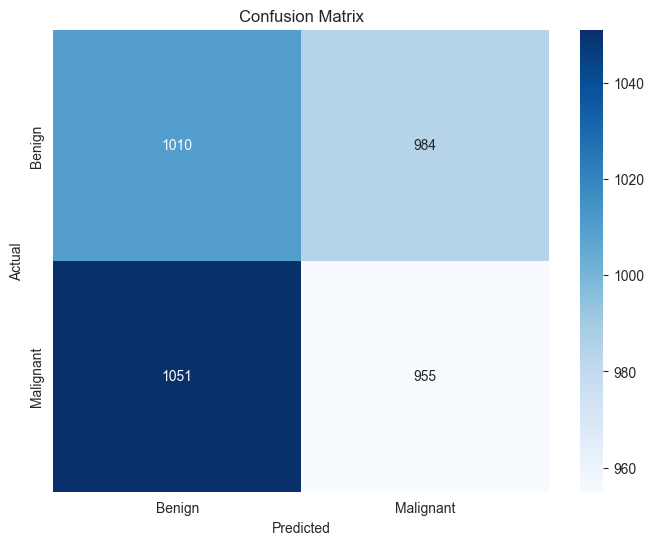

In [326]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

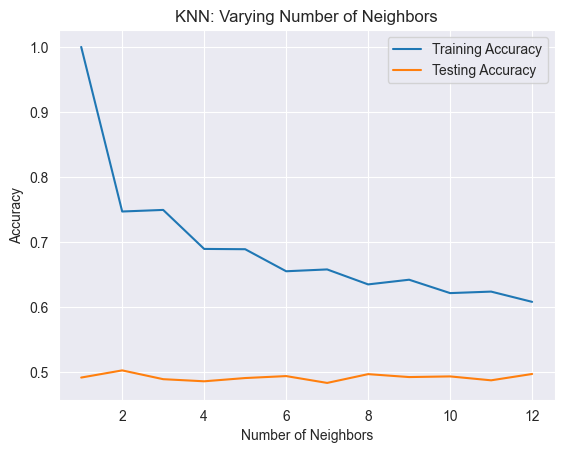

In [327]:
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

With the accuracy of 0.50. The model is not good at classifying the benign and the malignant tumour rather than random guessing.

## Task 2
The goal of this exercise is to predict **Life Expectancy** (`Life expectancy`) based on various health, economic, and demographic factors using **Linear Regression**. The model should be optimized using **Ridge and Lasso Regression**.

1. **Preprocessing**
- Remove irrelevant columns (`Country`, `Year`).
- Encode categorical variables (`Status`).
- Handle missing values appropriately.
- Standardize numerical features (e.g., `GDP`, `Schooling`, `Alcohol`) using `StandardScaler`.
- Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
- Train a **basic Linear Regression** model and evaluate its performance.
- Implement **Ridge Regression** and **Lasso Regression**, tuning the `alpha` hyperparameter using **cross-validation**.

3. **Model Evaluation**:
- Compute the **Root Mean Squared Error (MSE)** for all models.
- Compare Ridge and Lasso performance to determine if regularization improves results.
- Plot **actual vs. predicted life expectancy** scores for each model.


1.Preprocessing

In [267]:
import pandas as pd
life_expectancy_df = pd.read_csv("Life Expectancy Data.csv")

In [268]:
life_expectancy_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [269]:
life_expectancy_df = life_expectancy_df.rename(columns={"Life expectancy ": "Life expectancy"})

In [270]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [271]:
life_expectancy_df = life_expectancy_df.drop(columns=['Country','Year'])

In [272]:
life_expectancy_df.shape

(2938, 20)

In [273]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Status' column
life_expectancy_df['Status'] = label_encoder.fit_transform(life_expectancy_df['Status'])

In [274]:
life_expectancy_df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [275]:
life_expectancy_df.isnull().sum()

Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

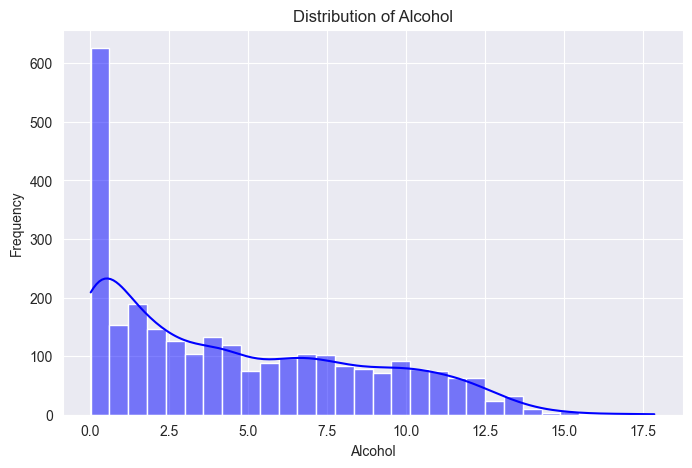

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of BMI values
plt.figure(figsize=(8, 5))
sns.histplot(life_expectancy_df["Alcohol"], bins=30, kde=True, color="blue")

# Labels and title
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.title("Distribution of Alcohol")

# Show the plot
plt.show()

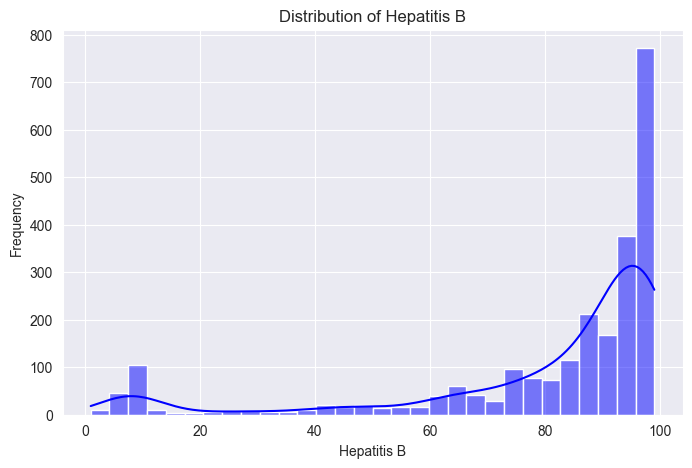

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of BMI values
plt.figure(figsize=(8, 5))
sns.histplot(life_expectancy_df["Hepatitis B"], bins=30, kde=True, color="blue")

# Labels and title
plt.xlabel("Hepatitis B")
plt.ylabel("Frequency")
plt.title("Distribution of Hepatitis B")

# Show the plot
plt.show()

In [278]:
life_expectancy_df.dtypes

Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [279]:
life_expectancy_df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [280]:
life_expectancy_df.isnull().sum()

Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [281]:
life_expectancy_df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [282]:
! pip install fancyimpute

Der Befehl "pip" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [283]:
#from fancyimpute import IterativeImputer
import pandas as pd

# Assuming you have a DataFrame `life_expectancy_df`
# Initialize MICE imputer (IterativeImputer is used in place of MICE in the library)
mice_imputer = IterativeImputer()

# Apply MICE imputation to your DataFrame
life_expectancy_df = pd.DataFrame(mice_imputer.fit_transform(life_expectancy_df), columns=life_expectancy_df.columns)

# Check the imputed data
print(life_expectancy_df)

      Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0        1.0             65.0            263.0           62.0     0.01   
1        1.0             59.9            271.0           64.0     0.01   
2        1.0             59.9            268.0           66.0     0.01   
3        1.0             59.5            272.0           69.0     0.01   
4        1.0             59.2            275.0           71.0     0.01   
...      ...              ...              ...            ...      ...   
2933     1.0             44.3            723.0           27.0     4.36   
2934     1.0             44.5            715.0           26.0     4.06   
2935     1.0             44.8             73.0           25.0     4.43   
2936     1.0             45.3            686.0           25.0     1.72   
2937     1.0             46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0    1154

In [284]:
life_expectancy_df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,1.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,1.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [285]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

Model Implementation

In [286]:
from sklearn.model_selection import train_test_split

# X should remain as a pandas DataFrame, and y should be a 1D array
X = life_expectancy_df.drop(['Life expectancy'], axis=1)
y = np.array(life_expectancy_df["Life expectancy"]) # This should be 1D array

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2350, 19) (588, 19) (2350,) (588,)


In [287]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [68.14176159 76.47061218], Actual Values: [73.7 75.9]


Measure the model performance

In [290]:
# Import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.8460394306319978
RMSE: 3.6599298686895203


In [291]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 13.39508664372569
R-squared: 0.8460394306319978


Cross validation

Ridge regression

In [292]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10, 100, 1000, 10000]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)

print(ridge_scores)

[0.8460240560165005, 0.8457857750933022, 0.8424583474311138, 0.8370972853246408, 0.8250812539486584, 0.6374792898675987]


In [293]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [0.1, 1, 10, 100, 1000, 10000]}
ridge = Ridge()

# Perform Grid Search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Get the best parameter and corresponding R² score
best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_

print(best_alpha, best_score)

0.1 0.8287514101670939


In [294]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8460240560165005

Lasso Regression

[-9.31687080e-02 -1.85975561e-02  1.01326900e-01  5.03855043e-02
  5.53407225e-05 -1.73631164e-03 -1.52328403e-05  3.74741331e-02
 -7.50037738e-02  2.43554257e-02  1.79451806e-02  3.14581718e-02
 -4.86579948e-01  6.18895798e-05 -1.15954061e-09 -8.47142894e-02
 -4.26223869e-03  0.00000000e+00  1.08081450e+00]


C:\Users\Sowjanya Batchu\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.302e+04, tolerance: 2.659e+01
  model = cd_fast.enet_coordinate_descent(


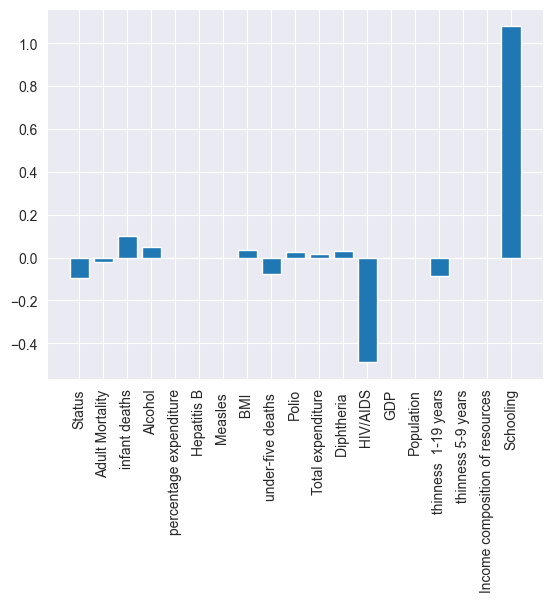

In [295]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

relevant_columns = life_expectancy_df_imputed.drop(['Life expectancy'], axis=1).columns

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(relevant_columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [296]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
 #Define the parameter grid for Lasso Regression
param_grid = {"alpha": np.logspace(-4, 2, 10)}  # Testing alpha values from 0.0001 to 100

# Instantiate Lasso regression model
lasso = Lasso(max_iter=5000)  # Increasing iterations to avoid convergence issues

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Get the best parameter and corresponding R² score
best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_

print(best_alpha, best_score)

0.00046415888336127773 0.8287583298934734


Model Evaluation

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [298]:


# Step 2: Train Linear Regression, Ridge, and Lasso models
linear_reg = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit models
linear_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Step 3: Predict on the test data
linear_reg_pred = linear_reg.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

# Step 4: Compute RMSE for all models
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))


In [299]:
linear_reg_rmse

np.float64(3.6599298686895203)

In [300]:
ridge_rmse

np.float64(3.6629435605189546)

In [301]:
lasso_rmse

np.float64(3.7850111420673773)

The ridge regression and lasso regression doesnt improved the model performance. the linear regression has the lowest rmse compared to the lasso and ridge regression.

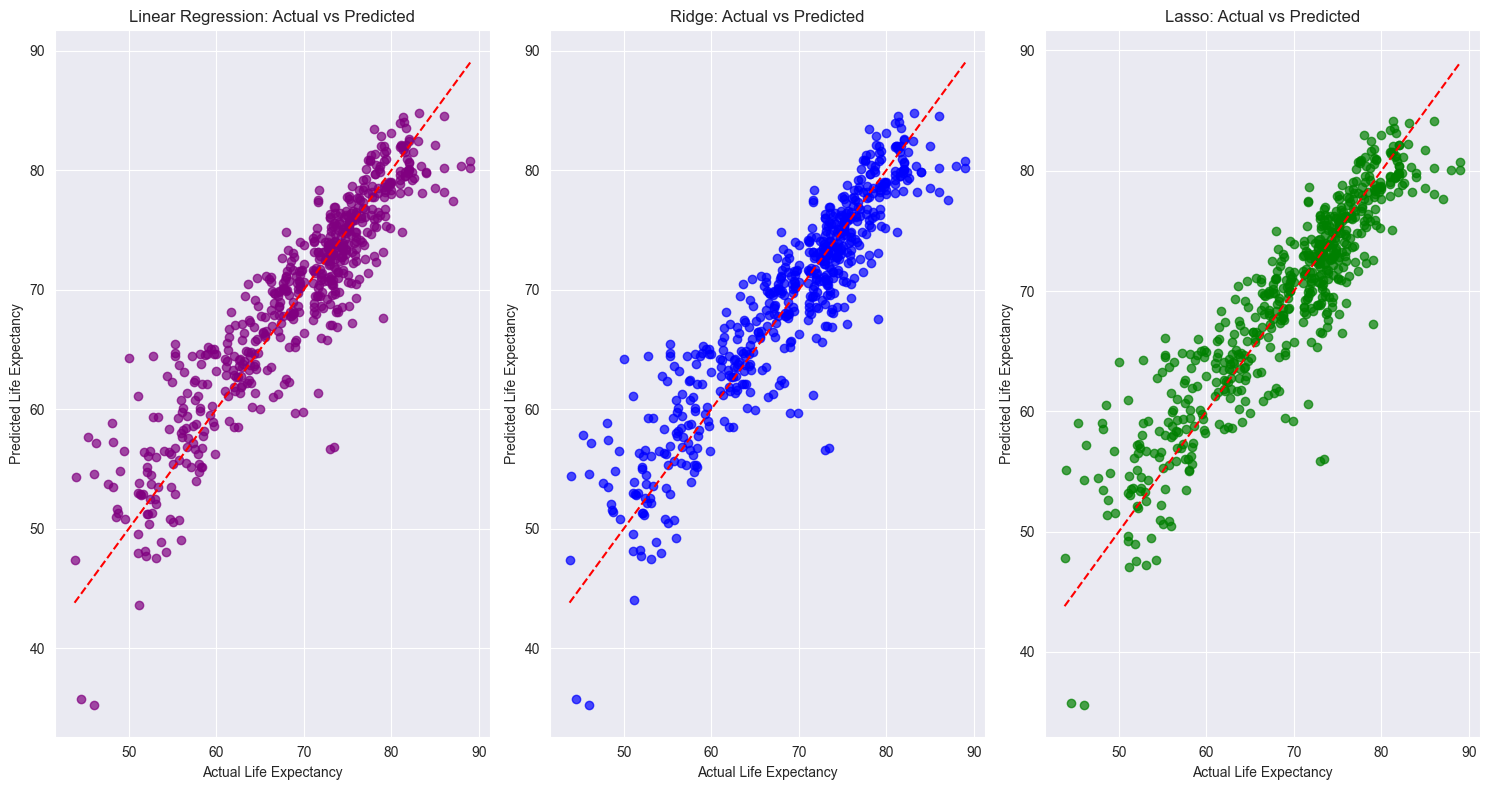

In [302]:
# Step 6: Plot actual vs. predicted life expectancy for each model

# Plot for Linear Regression
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_reg_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")

# Plot for Ridge
plt.subplot(1, 3, 2)
plt.scatter(y_test, ridge_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Ridge: Actual vs Predicted")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")

# Plot for Lasso
plt.subplot(1, 3, 3)
plt.scatter(y_test, lasso_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Lasso: Actual vs Predicted")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")

# Show plots
plt.tight_layout()
plt.show()

